# Parabilic SAR AF パラメータとロスカットのスクリーニング・チェック

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import os

import numpy as np
import pandas as pd
from matplotlib import (
    font_manager as fm,
    pyplot as plt,
)

In [3]:
def plot(df, date_target, code):
    FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
    fm.fontManager.addfont(FONT_PATH)
    
    # FontPropertiesオブジェクト生成（名前の取得のため）
    font_prop = fm.FontProperties(fname=FONT_PATH)
    font_prop.get_name()
    
    plt.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['font.size'] = 16
    
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    
    x = df['af_step']
    n = len(df.columns)
    list_losscut = df.columns[n-3:n]
    for losscut in list_losscut:
        y = df[losscut]
        if type(losscut) is str:
            label_str = 'Loss Cut = none'
        else:
            label_str = 'Loss Cut =-%dx呼値' % losscut
        ax.plot(x, y, lw=1, label=label_str)
    
    ax.axhline(0, color='black', lw=0.5)
    ax.set_xscale('log')
    ax.grid(which='major', color='gray',linestyle='-', linewidth=0.5)
    ax.grid(which='minor', color='gray',linestyle='dotted', linewidth=0.5)
    
    ax.set_xlabel('AF step')
    ax.set_ylabel('Profit (JPY)')
    
    ax.legend(fontsize=9)
    ax.set_title('tick data on %s with AF[init] = 0 and AF[max] = AF[step]x10' % date_target, fontsize=10)
    
    plt.suptitle('%s : AF dependency in Parabolic SAR' % code, fontsize=16)
    plt.savefig('./study_201_AF_LossCut/%s_%s.png' % (date_target, code))
    plt.show()

In [4]:
date_target = '2025-04-03'
path_base = '../doe/results_Simple_SAR_LossCut'

## 三菱重工業 (7011)

     #  af_init  af_step   af_max   none      3      6
0    1        0  0.00001  0.00010  -1950  -2250  -2350
1    2        0  0.00002  0.00020   4450  -2650  -1250
2    3        0  0.00003  0.00030  -1350  -3000  -3450
3    4        0  0.00005  0.00050  -3550  -1450  -2500
4    5        0  0.00007  0.00075   5250   -800  -1800
5    6        0  0.00010  0.00100  10650  -3150  -3900
6    7        0  0.00020  0.00200  11550  -3500   -850
7    8        0  0.00030  0.00300  10250  -1300  -1150
8    9        0  0.00050  0.00500   1150     50   -200
9   10        0  0.00075  0.00750  -2450  -8000  -4950
10  11        0  0.00100  0.01000   5650   -150  -1350
11  12        0  0.00200  0.02000    950  -4250  -5450
12  13        0  0.00300  0.03000   1350    300    950
13  14        0  0.00500  0.05000  -8250  -6550  -5450
14  15        0  0.00750  0.07500  -7550  -4500  -4700
15  16        0  0.01000  0.10000  -3250    750  -2600
16  17        0  0.02000  0.20000 -15350  -9200 -16300
17  18    

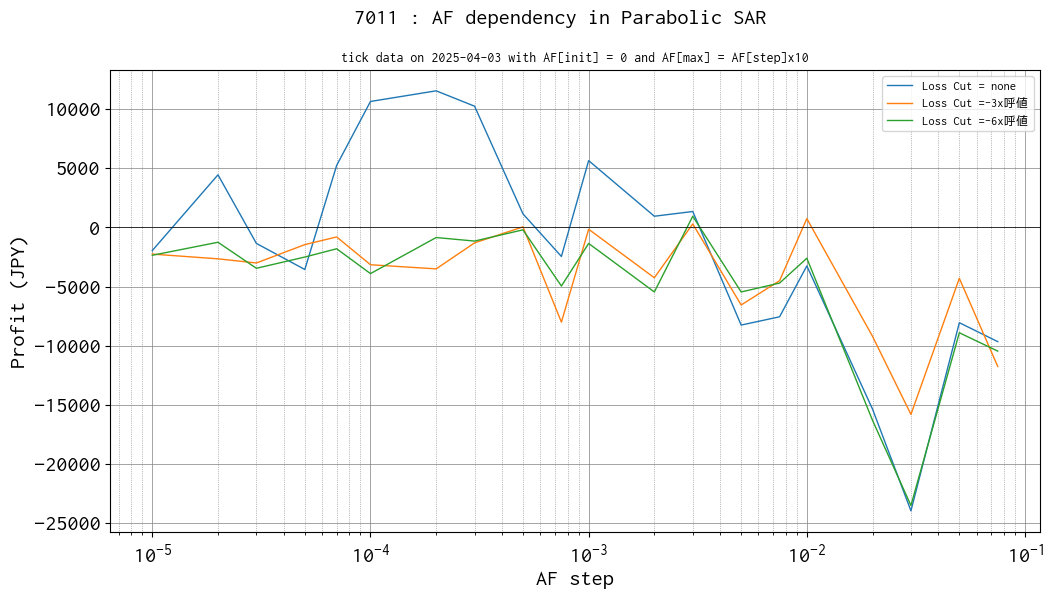

In [5]:
code = '7011'
ods_name = os.path.join(path_base, 'summary_%s_%s.ods' % (date_target, code))
ods_name
df = pd.read_excel(ods_name)
print(df)
plot(df, date_target, code)

## トヨタ自動車 (7203)

     #  af_init  af_step   af_max   none      3      6
0    1        0  0.00001  0.00010  -2100  -1150  -1550
1    2        0  0.00002  0.00020      0  -1250   -500
2    3        0  0.00003  0.00030   5700   1450   2350
3    4        0  0.00005  0.00050    500  -1650    950
4    5        0  0.00007  0.00075    600    650   4300
5    6        0  0.00010  0.00100   7100   5150   6600
6    7        0  0.00020  0.00200  13500   -650   4750
7    8        0  0.00030  0.00300  13700   5900  12450
8    9        0  0.00050  0.00500   8600   1500   8350
9   10        0  0.00075  0.00750  10900   9750  10600
10  11        0  0.00100  0.01000   6800   2250   2600
11  12        0  0.00200  0.02000   4000   6500   5650
12  13        0  0.00300  0.03000   4900   5650   1800
13  14        0  0.00500  0.05000   5300   5100   4500
14  15        0  0.00750  0.07500   8300   4850   6200
15  16        0  0.01000  0.10000   6500  -4200   -100
16  17        0  0.02000  0.20000   1200  -4550   -250
17  18    

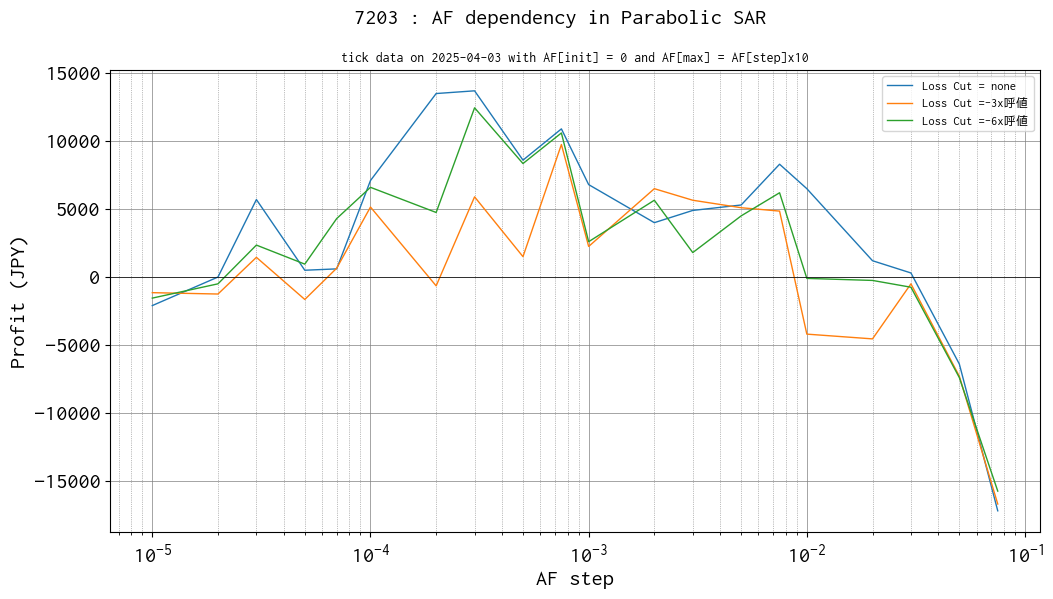

In [6]:
code = '7203'
ods_name = os.path.join(path_base, 'summary_%s_%s.ods' % (date_target, code))
ods_name
df = pd.read_excel(ods_name)
print(df)
plot(df, date_target, code)

## 三菱ＵＦＪフィナンシャルＧ (8306)

     #  af_init  af_step   af_max   none      3      6
0    1        0  0.00001  0.00010    350    300    100
1    2        0  0.00002  0.00020   4050   2100   2000
2    3        0  0.00003  0.00030   6650   6650   6650
3    4        0  0.00005  0.00050   7350   1500   4900
4    5        0  0.00007  0.00075   4950   5300   4850
5    6        0  0.00010  0.00100   5550   3950   5450
6    7        0  0.00020  0.00200   5750   2900   4650
7    8        0  0.00030  0.00300   -250   -550  -1350
8    9        0  0.00050  0.00500  -4850    550  -2750
9   10        0  0.00075  0.00750  -2350    200   1250
10  11        0  0.00100  0.01000  -4050  -1400    650
11  12        0  0.00200  0.02000  -4250  -2650  -3950
12  13        0  0.00300  0.03000  -9250  -8150  -5600
13  14        0  0.00500  0.05000  -4650  -7600  -7350
14  15        0  0.00750  0.07500  -9450  -9950  -8950
15  16        0  0.01000  0.10000  -6250  -5000  -7250
16  17        0  0.02000  0.20000    750  -1550  -2250
17  18    

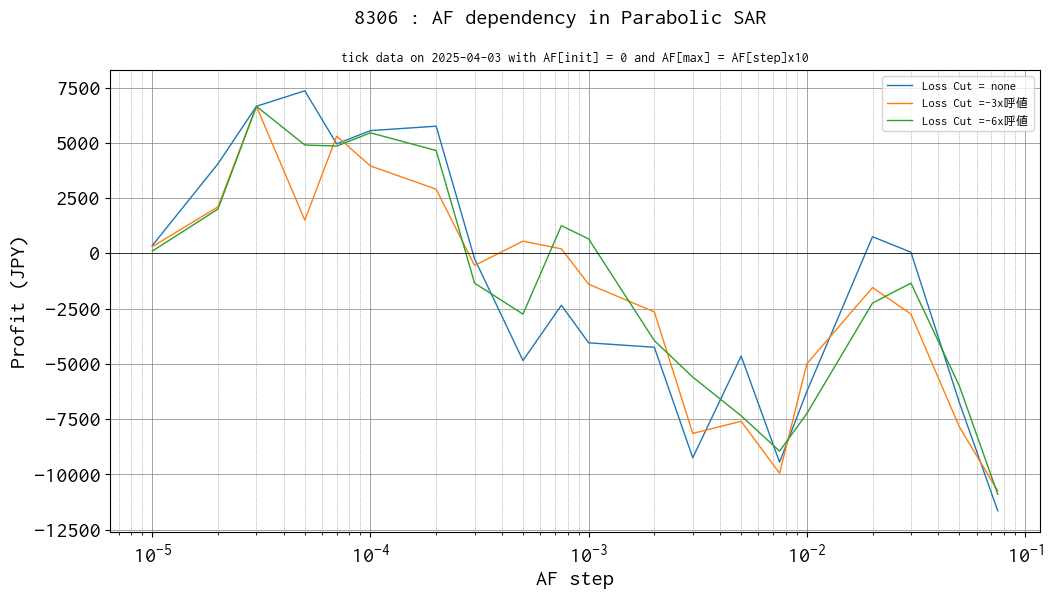

In [7]:
code = '8306'
ods_name = os.path.join(path_base, 'summary_%s_%s.ods' % (date_target, code))
ods_name
df = pd.read_excel(ods_name)
print(df)
plot(df, date_target, code)